# Midterm Project: Predicting Housing Prices at Denver, Iowa Part I

The Ames Housing Dataset was introduced by Professor Dean De Cock in 2011 for use in data science education. It contains 2,919 observations of housing sales in Ames, Iowa between 2006 and 2010. There are a total of 79 features describing each house's size, quality, area, age, and other miscellaneous attributes.

From Kaggle:
    
    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
    
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# I. Overall understanding of the data

## Load the data as a pandas DataFrame.

In [1159]:
# housingdata_df = housingdata -- > dataframe
housingdata = pd.read_csv("Data/housingprices/train.csv", delimiter=",")

## Display:
- The first 5 rows of the dataset
- Number of instances
- Number of features
- Feature Names
- Data type of each feature
- Number of missing values for each feature

In [1160]:
# The first 5 rows of the dataset:
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1161]:
# Number of instances = 1460
# Number of features = 81
print("Shape:", housingdata.shape)

Shape: (1460, 81)


In [1162]:
# Feature names
print("Feature names:", ", ".join(housingdata.columns))

Feature names: Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice


In [1163]:
# Data type of each feature
print("Data types:", housingdata.dtypes)

Data types: Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt  

In [1164]:
# Number of missing values for each feature

# np.sum(housingdata.isnull(), axis=0)
pd.isnull(housingdata).sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## Check if the data types are correctly identified.

In [1165]:
# Change the data type of Id to float
housingdata["Id"] = housingdata["Id"].astype(float)
print("type\n", housingdata.dtypes)

type
 Id               float64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      fl

## Handle missing values. 
- Remove the feature if more than 30% of its values are missing
- Remove the rows containing the missing values less than 5%
- If the percentage of the missing values is between 5% and 30%, fill the missing data <br> with the most frequent value (categorical feature) or the average value (for numeric feature)


In [1166]:
housingdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6.0,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7.0,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8.0,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9.0,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10.0,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [1167]:
# Remove the feature if more than 30% of its values are missing

# PoolQC           1453
# MiscFeature      1406
# Alley            1369
# Fence            1179
# FireplaceQu       690

housingdata.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)
housingdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6.0,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7.0,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8.0,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9.0,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10.0,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [1168]:
# Remove the rows containing the missing values less than 5% 

# BsmtQual           37
# BsmtCond           37
# BsmtExposure       38
# BsmtFinType1       37
# BsmtFinType2       38
# MasVnrType          8
# MasVnrArea          8
# Electrical          1

housingdata = housingdata.dropna(axis=0)
housingdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6.0,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7.0,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,9.0,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10.0,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,11.0,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500


In [1169]:
# Fill the missing data of the missing values between 5% and 30%
# with the most frequent value (categorical feature)

# LotFrontage       259
# GarageType         81
# GarageYrBlt        81
# GarageFinish       81
# GarageQual         81
# GarageCond         81

# freqs = housingdata['LotFrontage'].value.counts()
# mode = freqs.argmax()
# mode
# housingdata.loc[i, 'LotFrontage'] = mode
# housingdata

housingdata = housingdata.fillna(housingdata.mode().iloc[0])
housingdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2.0,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3.0,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4.0,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5.0,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6.0,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7.0,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,9.0,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10.0,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000
10,11.0,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,129500


In [1170]:
# Or with average value (numerical feature)

# housingdata.fillna(housingdata.mean())
# avg = housingdata['LotFrontage'].mean()
# index = pd.isnull(housingdata['LotFrontage'])
# housingdata.loc[index, 'LotFrontage'] = avg
# housingdata

In [1171]:
print("Shape:", housingdata.shape)

Shape: (1094, 76)


In [1172]:
# Data Clean Up: It is now free of missing values
np.sum(housingdata.isnull(), axis=0)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

# II. Most relevant features

OveralQual, YearBuilt, TotalBsmtSF, GrLivArea, SalePrice

## Descriptive statistics:

- minimum
- mean
- median
- maximum
- standard deviation

In [1173]:
# Statistics of numerical features
housingdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### 1. OverallQual: Overall material and finish quality

In [1174]:
# OverallQual

# Minimum
housingdata_min = housingdata['OverallQual'].min()
print("Minimum:", housingdata_min)

# Mean
housingdata_mean = housingdata['OverallQual'].mean()
print("Mean:", housingdata_mean)

# Median
housingdata_median = housingdata['OverallQual'].median()
print("Median:", housingdata_median)

# Maximum
housingdata_max = housingdata['OverallQual'].max()
print("Maximum:", housingdata_max)

# Standard Deviation
housingdata_std = housingdata.loc[:,"OverallQual"].std()
print("Standard Deviation:", housingdata_std)

Minimum: 2
Mean: 6.247714808043876
Median: 6.0
Maximum: 10
Standard Deviation: 1.3667965923997294


### 2. YearBuilt: Original construction date


In [1175]:
# YearBuilt

# Minimum
housingdata_min = housingdata['YearBuilt'].min()
print("Minimum:", housingdata_min)

# Mean
housingdata_mean = housingdata['YearBuilt'].mean()
print("Mean:", housingdata_mean)

# Median
housingdata_median = housingdata['YearBuilt'].median()
print("Median:", housingdata_median)

# Maximum
housingdata_max = housingdata['YearBuilt'].max()
print("Maximum:", housingdata_max)

# Standard Deviation
housingdata_std = housingdata.loc[:,"YearBuilt"].std()
print("Standard Deviation:", housingdata_std)


Minimum: 1880
Mean: 1972.4122486288848
Median: 1975.0
Maximum: 2010
Standard Deviation: 31.1897518162748


### 3. TotalBsmtSF: Total basement area in square feet

In [1176]:
# TotalBsmtSF

# Minimum
housingdata_min = housingdata['TotalBsmtSF'].min()
print("Minimum:", housingdata_min)

# Mean
housingdata_mean = housingdata['TotalBsmtSF'].mean()
print("Mean:", housingdata_mean)

# Median
housingdata_median = housingdata['TotalBsmtSF'].median()
print("Median:", housingdata_median)

# Maximum
housingdata_max = housingdata['TotalBsmtSF'].max()
print("Maximum:", housingdata_max)

# Standard Deviation
housingdata_std = housingdata.loc[:,"TotalBsmtSF"].std()
print("Standard Deviation:", housingdata_std)


Minimum: 105
Mean: 1099.5612431444242
Median: 1023.0
Maximum: 6110
Standard Deviation: 415.8512619821424


### 4. GrLivArea: Above ground living area in square feet

In [1177]:
# GrLivArea

# Minimum
housingdata_min = housingdata['GrLivArea'].min()
print("Minimum:", housingdata_min)

# Mean
housingdata_mean = housingdata['GrLivArea'].mean()
print("Mean:", housingdata_mean)

# Median
housingdata_median = housingdata['GrLivArea'].median()
print("Median:", housingdata_median)

# Maximum
housingdata_max = housingdata['GrLivArea'].max()
print("Maximum:", housingdata_max)

# Standard Deviation
housingdata_std = housingdata.loc[:,"GrLivArea"].std()
print("Standard Deviation:", housingdata_std)


Minimum: 438
Mean: 1535.0274223034735
Median: 1480.0
Maximum: 5642
Standard Deviation: 526.124028438537


### 5. SalePrice

In [1178]:
# SalePrice

# Minimum
housingdata_min = housingdata['SalePrice'].min()
print("Minimum:", housingdata_min)

# Mean
housingdata_mean = housingdata['SalePrice'].mean()
print("Mean:", housingdata_mean)

# Median
housingdata_median = housingdata['SalePrice'].median()
print("Median:", housingdata_median)

# Maximum
housingdata_max = housingdata['SalePrice'].max()
print("Maximum:", housingdata_max)

# Standard Deviation
housingdata_std = housingdata.loc[:,"SalePrice"].std()
print("Standard Deviation:", housingdata_std)


Minimum: 35311
Mean: 187033.26325411335
Median: 165750.0
Maximum: 755000
Standard Deviation: 83165.33215062549


## Histogram

### OverallQual

Text(0, 0.5, 'Frequency')

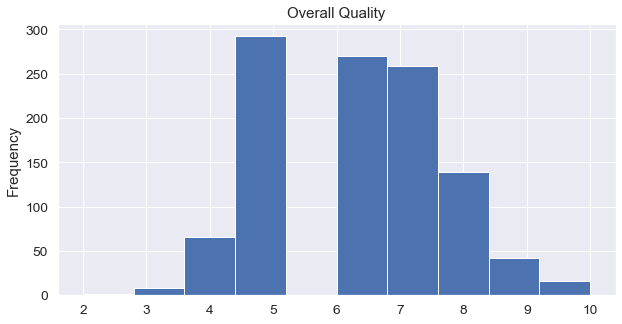

In [1179]:
# 1. OverallQual: Overall material and finish quality

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
housingdata['OverallQual'].hist()
ax1.set_title("Overall Quality")
ax1.set_ylabel("Frequency")

### YearBuilt

Text(0.5, 0, 'Years')

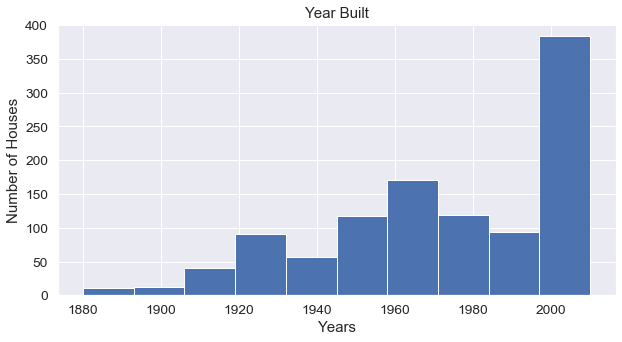

In [1180]:
# 2. YearBuilt: Original construction date

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
housingdata['YearBuilt'].hist()
ax1.set_title("Year Built")
ax1.set_ylabel("Number of Houses")
ax1.set_xlabel("Years")

### TotalBsmtSF

Text(0.5, 0, 'Area in Sq Feet')

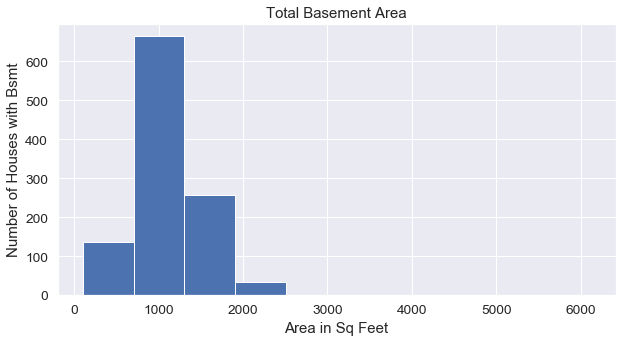

In [1181]:
# 3. TotalBsmtSF: Total basement area in square feet

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
housingdata['TotalBsmtSF'].hist()
ax1.set_title("Total Basement Area")
ax1.set_ylabel("Number of Houses with Bsmt")
ax1.set_xlabel("Area in Sq Feet")


### GrLivArea

Text(0.5, 0, 'Area in Sq Feet')

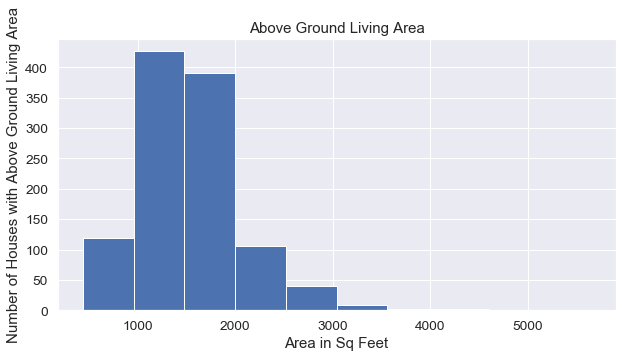

In [1182]:
# 4. GrLivArea: Above ground living area in square feet

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
housingdata['GrLivArea'].hist()
ax1.set_title("Above Ground Living Area")
ax1.set_ylabel("Number of Houses with Above Ground Living Area")
ax1.set_xlabel("Area in Sq Feet")


### SalePrice

Text(0.5, 0, 'Sale Price (Cost)')

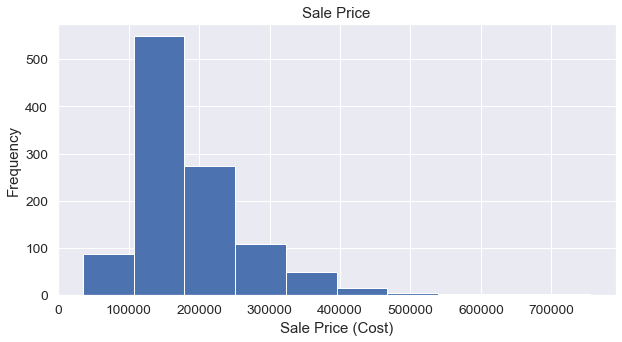

In [1183]:
# 5. SalePrice

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
housingdata['SalePrice'].hist()
ax1.set_title("Sale Price")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Sale Price (Cost)")

# Outliers

In [1184]:
# Outliers for all columns

Q1 = housingdata.quantile(0.25)
Q3 = housingdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 727.25
MSSubClass          50.00
LotFrontage         20.00
LotArea           3780.50
OverallQual          2.00
OverallCond          1.00
YearBuilt           50.00
YearRemodAdd        38.00
MasVnrArea         171.75
BsmtFinSF1         712.75
BsmtFinSF2           0.00
BsmtUnfSF          576.00
TotalBsmtSF        529.50
1stFlrSF           519.50
2ndFlrSF           729.00
LowQualFinSF         0.00
GrLivArea          615.00
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         242.50
WoodDeckSF         169.75
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        88500.00
dtype: float

### OverallQual :

In [1185]:
# Identify values that are too small or too large
housingdata['OverallQual'].value_counts().sort_index()

2       2
3       8
4      66
5     292
6     270
7     259
8     139
9      42
10     16
Name: OverallQual, dtype: int64

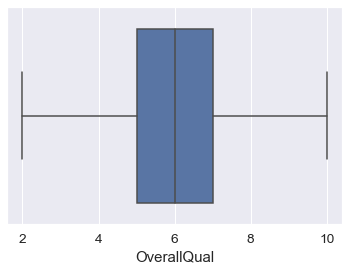

In [1186]:
import seaborn as sns
# Using a boxplot to visualize the outliers 
sns.boxplot(x=housingdata['OverallQual'])

In [1187]:
# Using Interquartile Range (IQR) score to measure the statistical dispersion, IQR = Q3 − Q1.

Q1 = housingdata['OverallQual'].quantile(0.25)
Q3 = housingdata['OverallQual'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.0


In [1188]:
housingdata.shape # Before removing outliers

(1094, 76)

In [1189]:
# Remove outliers 

def remove_outlier(housingdata, col):
    Q1 = housingdata[col].quantile(.25)
    Q3 = housingdata[col].quantile(.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5 * IQR)
    upperBound = Q3 + (1.5 * IQR)
    housingdata_out = housingdata.loc[(housingdata[col] > lowerBound) & (housingdata[col] < upperBound)]
    return housingdata_out
housingdata = remove_outlier(housingdata, 'OverallQual')

In [1190]:
housingdata.shape # After removing outliers

(1076, 76)

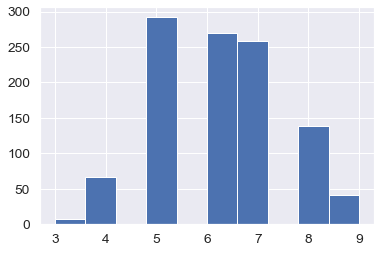

In [1191]:
housingdata['OverallQual'].hist()

### YearBuilt :

In [1192]:
# Identify values that are too small or too large
housingdata['YearBuilt'].value_counts().sort_index()

1880     4
1882     1
1885     2
1890     2
1892     1
1898     1
1900     8
1904     1
1905     1
1906     1
1908     2
1910    12
1912     1
1913     1
1914     3
1915     9
1916     5
1917     1
1918     6
1919     2
1920    23
1921     6
1922     5
1923     6
1924     5
1925    13
1926     6
1927     3
1928     7
1929     3
        ..
1981     3
1982     5
1983     2
1984     6
1985     1
1986     3
1987     2
1988     8
1989     2
1990     8
1991     2
1992     7
1993    13
1994    14
1995    13
1996    12
1997    11
1998    21
1999    21
2000    11
2001    11
2002    13
2003    34
2004    46
2005    64
2006    61
2007    43
2008    19
2009    16
2010     1
Name: YearBuilt, Length: 108, dtype: int64

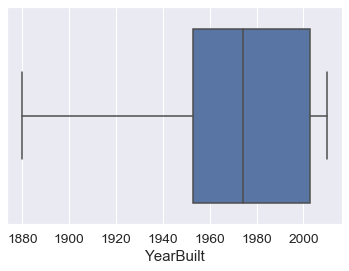

In [1193]:
sns.boxplot(x=housingdata['YearBuilt'])

In [1194]:
# Using Interquartile Range (IQR) score to measure the statistical dispersion, IQR = Q3 − Q1.

Q1 = housingdata['YearBuilt'].quantile(0.25)
Q3 = housingdata['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

50.0


In [1195]:
housingdata.shape # Before removing outliers

(1076, 76)

In [1196]:
# Remove outliers 

def remove_outlier(housingdata, col):
    Q1 = housingdata[col].quantile(.25)
    Q3 = housingdata[col].quantile(.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5 * IQR)
    upperBound = Q3 + (1.5 * IQR)
    housingdata_out = housingdata.loc[(housingdata[col] > lowerBound) & (housingdata[col] < upperBound)]
    return housingdata_out
housingdata = remove_outlier(housingdata, 'YearBuilt')

In [1197]:
housingdata.shape # After removing outliers

(1076, 76)

<b> The shape of the data remained the same, because there weren't any necessary outliers to be removed for YearBuilt. </b>

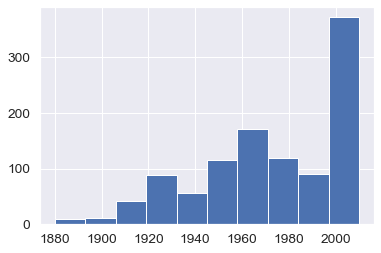

In [1198]:
housingdata['YearBuilt'].hist()

### TotalBsmtSF :

In [1199]:
# Outliers in TotalBsmtSF

# Identify values that are too small or too large
housingdata['TotalBsmtSF'].value_counts().sort_index()

105     1
190     1
264     1
360     1
372     1
384     2
440     2
458     1
462     1
482     1
483     7
485     1
504     1
506     1
520     2
525     1
528     1
530     1
533     1
536     1
539     1
540     2
546     2
547     3
559     1
560     3
561     1
570     1
576     1
585     2
       ..
1902    1
1905    1
1907    1
1922    1
1926    1
1930    1
1932    1
1935    1
1952    1
1976    1
1980    1
1986    1
1992    1
2000    1
2002    1
2033    1
2042    1
2046    1
2077    1
2109    1
2110    1
2121    1
2136    2
2153    1
2158    1
2216    1
2217    1
2223    1
2330    1
2524    1
Name: TotalBsmtSF, Length: 607, dtype: int64

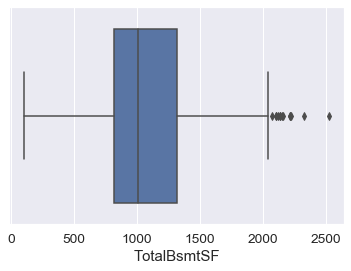

In [1200]:
sns.boxplot(x=housingdata['TotalBsmtSF'])

In [1201]:
# Using Interquartile Range (IQR) score to measure the statistical dispersion, IQR = Q3 − Q1.

Q1 = housingdata['TotalBsmtSF'].quantile(0.25)
Q3 = housingdata['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

502.25


In [1202]:
housingdata.shape # Before removing outliers

(1076, 76)

In [1203]:
# Remove outliers 

def remove_outlier(housingdata, col):
    Q1 = housingdata[col].quantile(.25)
    Q3 = housingdata[col].quantile(.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5 * IQR)
    upperBound = Q3 + (1.5 * IQR)
    housingdata_out = housingdata.loc[(housingdata[col] > lowerBound) & (housingdata[col] < upperBound)]
    return housingdata_out
housingdata = remove_outlier(housingdata, 'TotalBsmtSF')

In [1204]:
housingdata.shape # After removing outliers

(1063, 76)

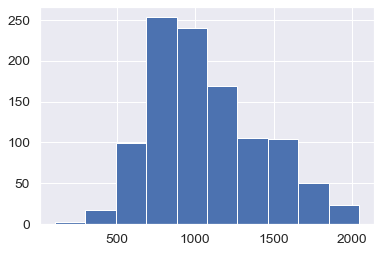

In [1205]:
housingdata['TotalBsmtSF'].hist()

### GrLivArea :

In [1206]:
# Outliers in GrLivArea

# Identify values that are too small or too large
housingdata['GrLivArea'].value_counts().sort_index()

520     1
616     1
630     2
672     2
691     1
694     1
720     1
747     2
752     1
764     1
767     1
768     3
773     1
778     1
780     1
784     1
789     2
790     1
792     1
803     1
804     1
813     1
816     6
825     1
832     1
833     1
835     1
838     1
841     1
845     1
       ..
2614    1
2622    1
2624    1
2630    1
2634    1
2640    1
2646    1
2668    1
2696    1
2704    1
2713    1
2727    1
2728    1
2730    1
2784    1
2792    1
2794    1
2822    1
2828    1
2868    1
2872    1
2978    1
3082    1
3112    1
3140    1
3194    1
3222    1
3238    1
3279    1
3493    1
Name: GrLivArea, Length: 694, dtype: int64

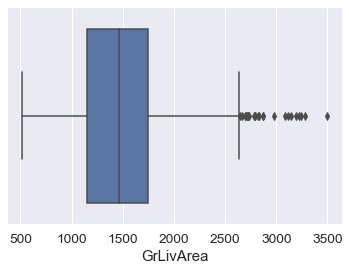

In [1207]:
sns.boxplot(x=housingdata['GrLivArea'])

In [1208]:
# Using Interquartile Range (IQR) score to measure the statistical dispersion, IQR = Q3 − Q1.

Q1 = housingdata['GrLivArea'].quantile(0.25)
Q3 = housingdata['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

595.0


In [1209]:
housingdata.shape # Before removing outliers

(1063, 76)

In [1210]:
# Remove outliers 

def remove_outlier(housingdata, col):
    Q1 = housingdata[col].quantile(.25)
    Q3 = housingdata[col].quantile(.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5 * IQR)
    upperBound = Q3 + (1.5 * IQR)
    housingdata_out = housingdata.loc[(housingdata[col] > lowerBound) & (housingdata[col] < upperBound)]
    return housingdata_out
housingdata = remove_outlier(housingdata, 'GrLivArea')

In [1211]:
housingdata.shape # After removing outliers

(1039, 76)

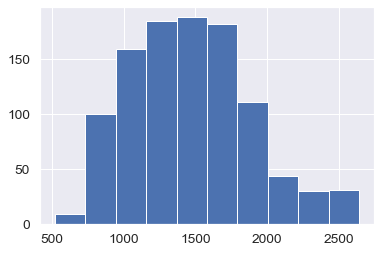

In [1212]:
housingdata['GrLivArea'].hist()

### SalePrice :

In [1213]:
# Outliers in SalePrice

# Identify values that are too small or too large
housingdata['SalePrice'].value_counts().sort_index()

40000     1
55993     1
58500     1
60000     1
62383     1
64500     1
66500     1
67000     1
68400     1
68500     1
73000     1
75000     1
76000     1
78000     1
79000     1
79500     1
79900     1
80000     3
81000     1
82000     1
82500     1
83000     2
85000     2
85400     1
86000     2
87000     3
88000     3
89000     1
89471     1
89500     1
         ..
336000    1
337000    1
339750    1
340000    1
341000    1
342643    1
345000    1
348000    1
350000    1
354000    1
360000    1
361919    1
367294    1
369900    1
370878    1
372402    1
372500    1
374000    1
377426    1
377500    1
378500    1
385000    1
392000    1
392500    1
394432    1
394617    1
395000    1
395192    1
402000    1
440000    1
Name: SalePrice, Length: 521, dtype: int64

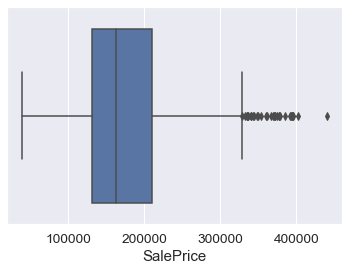

In [1214]:
sns.boxplot(x=housingdata['SalePrice'])

In [1215]:
# Using Interquartile Range (IQR) score to measure the statistical dispersion, IQR = Q3 − Q1.

Q1 = housingdata['SalePrice'].quantile(0.25)
Q3 = housingdata['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

78800.0


In [1216]:
housingdata.shape # Before removing outliers

(1039, 76)

In [1217]:
# Remove outliers 

def remove_outlier(housingdata, col):
    Q1 = housingdata[col].quantile(.25)
    Q3 = housingdata[col].quantile(.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - (1.5 * IQR)
    upperBound = Q3 + (1.5 * IQR)
    housingdata_out = housingdata.loc[(housingdata[col] > lowerBound) & (housingdata[col] < upperBound)]
    return housingdata_out
housingdata = remove_outlier(housingdata, 'SalePrice')

In [1218]:
housingdata.shape # After removing outliers

(1004, 76)

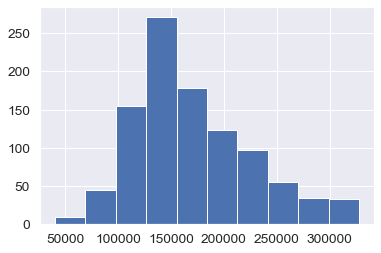

In [1219]:
housingdata['SalePrice'].hist()

The shape of the data decreased from 1094 to 1004 due to the removed outliers. <br> After removing the outliers you can recognize a linear regression in the histograms <br> for the features <b> OverallQual, TotalBsmtSF, GrLivArea, and SalePrice. </b>

# III. Bivariate Analysis
For each of the four chosen predictive feature:
- Draw the scatter plot of this feature against SalePrice (set title, axis label properly).
- Calculate the correlation coefficient
- Describe what you discover: positive correlation, negative correlation, no correlation

### 1. Draw the scatter plot of this feature against SalePrice (set title, axis label properly).


Text(0, 0.5, 'Sale Price (Cost)')

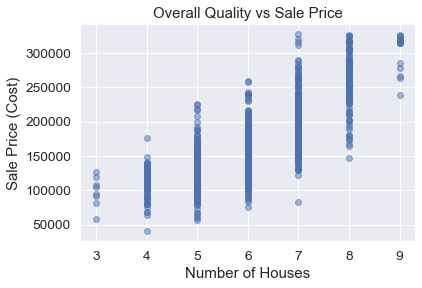

In [1220]:
# OverallQual vs SalePrice
plt.scatter(housingdata['OverallQual'], housingdata['SalePrice'], alpha=0.5)
plt.title("Overall Quality vs Sale Price")
plt.xlabel('Number of Houses')
plt.ylabel('Sale Price (Cost)')

Text(0, 0.5, 'Sale Price (Cost)')

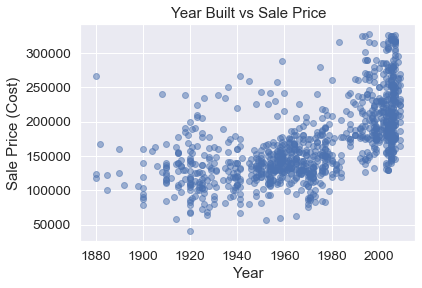

In [1221]:
# YearBuilt vs SalePrice
plt.scatter(housingdata['YearBuilt'], housingdata['SalePrice'], alpha=0.5)
plt.title("Year Built vs Sale Price")
plt.xlabel('Year')
plt.ylabel('Sale Price (Cost)')

Text(0, 0.5, 'Sale Price (Cost)')

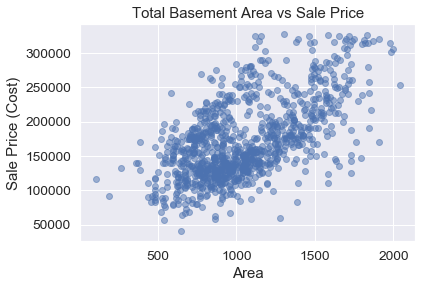

In [1222]:
# TotalBsmtSF vs SalePrice
plt.scatter(housingdata['TotalBsmtSF'], housingdata['SalePrice'], alpha=0.5)
plt.title("Total Basement Area vs Sale Price")
plt.xlabel('Area')
plt.ylabel('Sale Price (Cost)')

Text(0, 0.5, 'Sale Price (Cost)')

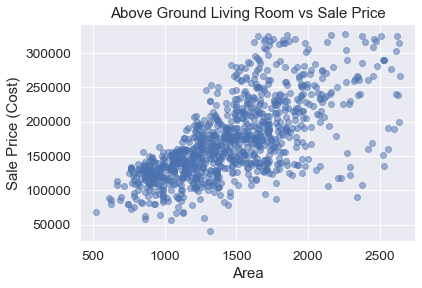

In [1223]:
# GrLivArea vs SalePrice
plt.scatter(housingdata['GrLivArea'], housingdata['SalePrice'], alpha=0.5)
plt.title("Above Ground Living Room vs Sale Price")
plt.xlabel('Area')
plt.ylabel('Sale Price (Cost)')

### 2. Calculate the correlation coefficient


In [1224]:
print("Correlation coefficient for Overall Qual vs Sale Price:", 
np.corrcoef(housingdata['OverallQual'], housingdata['SalePrice']))

print("Correlation coefficient for Year Built vs Sale Price:", 
np.corrcoef(housingdata['YearBuilt'], housingdata['SalePrice']))

print("Correlation coefficient for Total Basement Area vs Sale Price:", 
np.corrcoef(housingdata['TotalBsmtSF'], housingdata['SalePrice']))

print("Correlation coefficient for Above Ground Living Room vs Sale Price:", 
np.corrcoef(housingdata['GrLivArea'], housingdata['SalePrice']))


Correlation coefficient for Overall Qual vs Sale Price: [[1.         0.78989796]
 [0.78989796 1.        ]]
Correlation coefficient for Year Built vs Sale Price: [[1.         0.61080306]
 [0.61080306 1.        ]]
Correlation coefficient for Total Basement Area vs Sale Price: [[1.         0.58962296]
 [0.58962296 1.        ]]
Correlation coefficient for Above Ground Living Room vs Sale Price: [[1.         0.66173828]
 [0.66173828 1.        ]]


### 3. Describe what you discover: positive correlation, negative correlation, no correlation

The strongest positive correlation is between the overall quality of the houses and the sale price.

The second strongest correlation is between the houses who have a large area in the houses with living rooms above ground and the sale price.

The weakest correlation is between the years the houses were built and the sale price.


# Midterm Project: Predicting Housing Prices at Denver, Iowa Part II

## IV. Identify additional relevant feature

1. Find features with high correlation: For each numeric feature, calculate its correlation coefficient with feature SalePrice. Identify one feature (other than aforementioned 5 features) that has the strongest correlation with the sale prices.

2. Feature engineering: Based on our experience, the total area of the house and the average area per room should also be important factors in determining the price. Please create these two columns using the following formula:

- total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)

- area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”)

At this point, we have selected 6 features that are helpful to predict the sale price: <br> “OverallQual”, “YearBuilt”, “TotalBasmtSF”, “GrLivArea”, Feature selected in IV.1, “TotalArea”, “AreaPerRoom."

In [1225]:
# Statistics of numerical features
housingdata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,729.812749,56.922311,68.912351,9447.335657,6.064741,5.603586,1970.899402,1984.808765,89.127490,399.453187,...,86.823705,42.722112,22.722112,3.104582,15.148406,1.219124,22.523904,6.329681,2007.776892,170858.073705
std,422.518630,43.093720,22.568966,4461.986401,1.202686,1.059650,30.880383,21.060831,157.567785,392.361337,...,115.575054,58.950166,60.873186,29.067289,53.947695,27.348564,158.843529,2.684819,1.332927,56234.275821
min,1.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,40000.000000
25%,372.000000,20.000000,59.000000,7418.750000,5.000000,5.000000,1952.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,730.500000,50.000000,69.000000,9146.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,360.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159217.000000
75%,1096.750000,70.000000,80.000000,10955.750000,7.000000,6.000000,2002.000000,2004.000000,136.250000,661.250000,...,168.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,202925.000000
max,1460.000000,190.000000,313.000000,70761.000000,9.000000,9.000000,2009.000000,2010.000000,1600.000000,1619.000000,...,736.000000,418.000000,386.000000,508.000000,385.000000,648.000000,2500.000000,12.000000,2010.000000,328000.000000


In [1226]:
# For each numeric feature, calculate the correlation coefficient
housingdata.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.014719,-0.009106,-0.026887,-0.047992,0.015930,-0.023849,-0.018071,-0.071635,-0.025822,...,-0.010508,-0.006316,0.025648,-0.092132,0.002037,0.026465,0.027514,0.014112,-0.015957,-0.039129
MSSubClass,0.014719,1.000000,-0.430242,-0.327500,0.065695,-0.107310,0.042955,0.018185,0.076417,-0.050081,...,-0.005919,0.014669,-0.030230,-0.039834,-0.032173,-0.008995,-0.051074,-0.026854,-0.007193,-0.079269
LotFrontage,-0.009106,-0.430242,1.000000,0.537715,0.132735,-0.016504,0.074697,0.038220,0.091848,0.096622,...,0.045657,0.100459,-0.015966,0.086803,0.045748,0.016107,0.010902,0.044936,0.005381,0.318481
LotArea,-0.026887,-0.327500,0.537715,1.000000,0.101709,-0.022564,0.004076,0.012201,0.011524,0.105073,...,0.118964,0.094075,-0.028618,0.043660,0.115790,0.005703,0.029181,0.033336,-0.044689,0.316579
OverallQual,-0.047992,0.065695,0.132735,0.101709,1.000000,-0.197327,0.604324,0.549385,0.310342,0.056232,...,0.209310,0.294413,-0.162642,0.018800,0.030124,-0.002402,-0.066792,0.098056,-0.019590,0.789898
OverallCond,0.015930,-0.107310,-0.016504,-0.022564,-0.197327,1.000000,-0.425375,0.039711,-0.164421,-0.020025,...,-0.002045,-0.132324,0.077397,-0.006454,0.072240,0.016693,0.133515,-0.008686,0.050261,-0.145733
YearBuilt,-0.023849,0.042955,0.074697,0.004076,0.604324,-0.425375,1.000000,0.617338,0.284800,0.181684,...,0.212996,0.268115,-0.416412,0.021696,-0.056124,0.006520,-0.096623,0.013941,-0.015781,0.610803
YearRemodAdd,-0.018071,0.018185,0.038220,0.012201,0.549385,0.039711,0.617338,1.000000,0.123493,0.044766,...,0.222202,0.264283,-0.230364,0.011909,-0.033574,0.008132,-0.021535,0.032784,0.030016,0.582392
MasVnrArea,-0.071635,0.076417,0.091848,0.011524,0.310342,-0.164421,0.284800,0.123493,1.000000,0.152432,...,0.090091,0.105684,-0.135393,0.020672,0.064626,-0.010398,-0.057184,0.047759,-0.028090,0.353446
BsmtFinSF1,-0.025822,-0.050081,0.096622,0.105073,0.056232,-0.020025,0.181684,0.044766,0.152432,1.000000,...,0.162628,0.039525,-0.129415,0.009532,0.078446,0.022426,0.009552,0.007450,-0.003148,0.260032


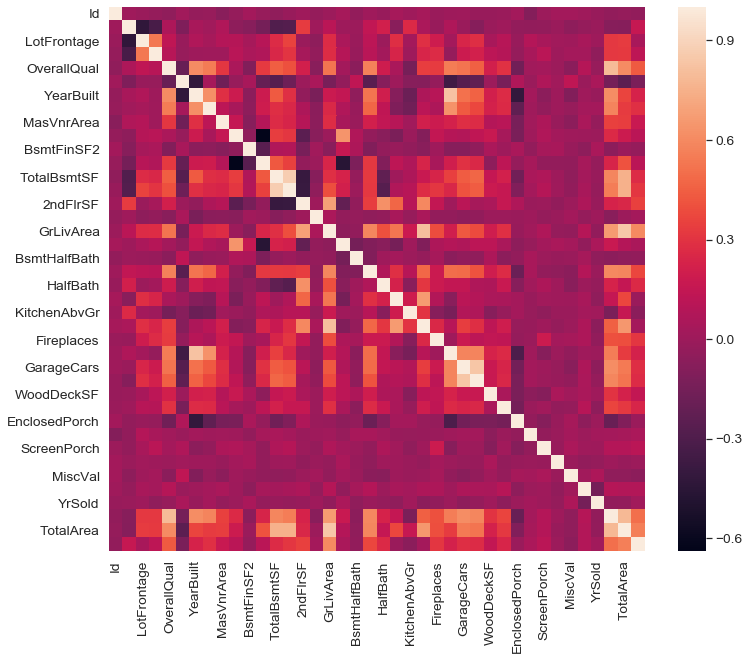

In [1266]:
# Correlation Matrix Heatmap
corrmat = housingdata.corr()
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(housingdata.corr())

#### 1. Identify one feature that has the strongest correlation with the sale prices other than the aforementioned 5 features.

GarageCars

In [1228]:
print("Correlation coefficient for GarageCars vs Sale Price:", 
np.corrcoef(housingdata['GarageCars'], housingdata['SalePrice']))

Correlation coefficient for GarageCars vs Sale Price: [[1.         0.61560856]
 [0.61560856 1.        ]]


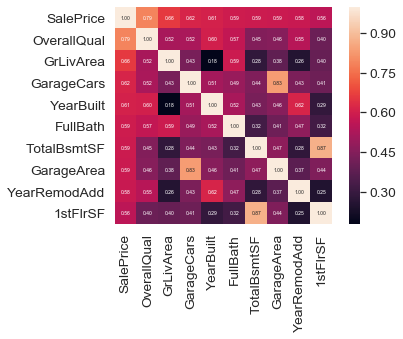

In [1229]:
# Top 10 correlations
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housingdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1230]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,YearBuilt
5,FullBath
6,TotalBsmtSF
7,GarageArea
8,YearRemodAdd
9,1stFlrSF


### Feature engineering

In [1231]:
# TotalArea
# total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)

housingdata['TotalArea'] = (housingdata['GrLivArea'] + housingdata['TotalBsmtSF'])

housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea
0,1.0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,2.0,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,3.0,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,4.0,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,5.0,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3343


In [1232]:
# “AreaPerRoom”
# area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).

housingdata['AreaPerRoom'] = (housingdata['GrLivArea'] / housingdata['TotRmsAbvGrd'])

housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,AreaPerRoom
0,1.0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,2566,213.750000
1,2.0,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,2524,210.333333
2,3.0,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,2706,297.666667
3,4.0,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,2473,245.285714
4,5.0,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,3343,244.222222


## V. Prepare data for k-Nearest-Neighbor method.

1. Create a new data frame with SalePrice and the 6 selected features.

2. For each of the 7 selected features, calculate its mean value and standard deviation. (These values will be used in V.3 and VI.1.)

3. Feature normalization: the kNN method usually works best if the features have the similar range, and each feature follows a normal (bell-shaped) distribution. To achieve this, subtract each column with its mean value, and then divide by its deviation.

In [1234]:
# Create new dataframe with SalePrice and the selected features

data = pd.DataFrame(housingdata, columns=['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'TotalArea', 'AreaPerRoom', 'SalePrice'])

data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice
0,7,2003,856,1710,2566,213.750000,208500
1,6,1976,1262,1262,2524,210.333333,181500
2,7,2001,920,1786,2706,297.666667,223500
3,7,1915,756,1717,2473,245.285714,140000
4,8,2000,1145,2198,3343,244.222222,250000


In [1235]:
# For each of the 7 selected features: Calculate mean value
data.mean()

OverallQual         6.064741
YearBuilt        1970.899402
TotalBsmtSF      1042.437251
GrLivArea        1451.013944
TotalArea        2493.451195
AreaPerRoom       227.307490
SalePrice      170858.073705
dtype: float64

In [1236]:
# For each of the 7 selected features: Calculate standard deviation
data.std()

OverallQual        1.202686
YearBuilt         30.880383
TotalBsmtSF      328.578547
GrLivArea        406.569869
TotalArea        590.850686
AreaPerRoom       39.268201
SalePrice      56234.275821
dtype: float64

In [1237]:
# Feature normalization: normalize values in new data frame

# Subtract each column with its mean value, and then divide by its deviation

# Option 1 

# cols = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'TotalArea', 'AreaPerRoom', 'SalePrice']
# means = {}
# stds = {}

# for col in cols:
#     mean = new_housingdata[col].mean()
#     std = new_housingdata[col].std()
#     new_housingdata[col] = (new_housingdata[col] - mean) / std
#     means[col] = mean
#     stds[col] = std    
# new_housingdata.head()

# Option 2 
# Normalized values:

data = (data-data.mean())/data.std()
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361


## VI. Apply the kNN (k=5) method to predict sale price of the first instance from the test set.

For first instance y, from the test set (test.csv), find 5 instances from the training set that are most similar to it. Consider using the following procedure:

y = the first line of the test.csv <br>
x = the 5 instances of the train.csv

1. For each of the 7 selected features, normalize its value in the same way as V.3 (use the mean value and standard deviation calculated in V.2).

2. Add a new column (“Diff”) to the data frame representing the training data. For each training instance x, the value of Diff is determined as: 

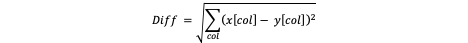

Here the summation is over the 7 selected columns.
3. Sort the rows so that values in the “Diff” column is listed in ascending order. The top 5 instances are the closest neighbors of the new instance y.

4. Calculate the average sale price of these 5 instances. This will be the prediction of the new instance. 

In [1238]:
# 1. Normalized values from the training set. 

data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361


In [1239]:
data.std()

OverallQual    1.0
YearBuilt      1.0
TotalBsmtSF    1.0
GrLivArea      1.0
TotalArea      1.0
AreaPerRoom    1.0
SalePrice      1.0
dtype: float64

In [1240]:
data.mean()

OverallQual    5.166297e-16
YearBuilt     -3.455044e-15
TotalBsmtSF   -2.182849e-16
GrLivArea      1.612809e-16
TotalArea      3.551829e-16
AreaPerRoom    1.800519e-15
SalePrice     -2.835271e-16
dtype: float64

In [1241]:
means

{'OverallQual': 6.064741035856573,
 'YearBuilt': 1970.8994023904384,
 'TotalBsmtSF': 1042.437250996016,
 'GrLivArea': 1451.0139442231075,
 'TotalArea': 2493.4511952191233,
 'AreaPerRoom': 227.30749002546804,
 'SalePrice': 170858.0737051793}

In [1242]:
stds

{'OverallQual': 1.2026855263299665,
 'YearBuilt': 30.880382858781374,
 'TotalBsmtSF': 328.57854686882007,
 'GrLivArea': 406.569869307717,
 'TotalArea': 590.8506858839526,
 'AreaPerRoom': 39.26820106392631,
 'SalePrice': 56234.27582093709}

In [1243]:
# Load test data
test_data = pd.read_csv("Data/housingprices/test.csv", delimiter=",")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [1244]:
# Add missing selected features to y (test data) = 'TotalArea' and 'AreaPerRoom'

test_data['TotalArea'] = (test_data['GrLivArea'] + test_data['TotalBsmtSF'])
test_data['AreaPerRoom'] = (test_data['GrLivArea'] / test_data['TotRmsAbvGrd'])
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,AreaPerRoom
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1778.0,179.200000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2658.0,221.500000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2557.0,271.500000
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,2530.0,229.142857
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,2560.0,256.000000


In [1245]:
y = test_data

In [1246]:
# Create a new dataframe for the test data with selected features

cols = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'TotalArea', 'AreaPerRoom']

y = y[cols]
y.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom
0,5,1961,882.0,896,1778.0,179.200000
1,6,1958,1329.0,1329,2658.0,221.500000
2,5,1997,928.0,1629,2557.0,271.500000
3,6,1998,926.0,1604,2530.0,229.142857
4,8,1992,1280.0,1280,2560.0,256.000000


In [1247]:
# Normalize y using means and stds calculated above 

y = (y-y.mean())/y.std()
y.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom
0,-0.750844,-0.340828,-0.370554,-1.215171,-0.958943,-1.112203
1,-0.054858,-0.439544,0.638706,-0.323429,0.159404,-0.218890
2,-0.750844,0.843770,-0.266693,0.294407,0.031049,0.837035
3,-0.054858,0.876675,-0.271209,0.242921,-0.003264,-0.057485
4,1.337113,0.679242,0.528071,-0.424342,0.034861,0.509698


In [1248]:
x = data

In [1249]:
x.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361


In [1250]:
# Find the k-Nearest-Neighbors
# Diff = square root of sum of squares of column-wise differences

x = data.loc[0]
x

# Difference between x and y
diff_overallQual = x['OverallQual'] - y['OverallQual']
diff_yearBuilt = x['YearBuilt'] - y['YearBuilt']
diff_totalBsmtSF = x['TotalBsmtSF'] - y['TotalBsmtSF']
diff_grLivArea = x['GrLivArea'] - y['GrLivArea']
diff_totalArea = x['TotalArea'] - y['TotalArea']
diff_areaPerRoom = x['AreaPerRoom'] - y['AreaPerRoom']
# diff = np.sqrt((x['OverallQual'] - y['OverallQual']) ** 2 + (x['YearBuilt'] - y['YearBuilt']) ** 2 + (x['TotalBsmtSF'] - y['TotalBsmtSF']) ** 2 + (x['GrLivArea'] - y['GrLivArea']) ** 2 + (x['TotalArea'] - y['TotalArea']) ** 2 + (x['AreaPerRoom'] - y['AreaPerRoom']) ** 2)


# Diff values
sum = 0
for col in cols:
    sum += (x[col] - y[col]) ** 2
diff = np.sqrt(sum)
diff.head()


0    3.077217
1    2.296761
2    1.997150
3    1.030197
4    1.872965
Name: OverallQual, dtype: float64

In [1251]:
# Add diff value of first instance
data.loc[0, 'Diff'] = diff.values[0]
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice,Diff
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377,3.077217
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243,NaN
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118,NaN
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741,NaN
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361,NaN


In [1252]:
# Add remaining diff values to dataset 
data.loc[1, 'Diff'] = diff.values[1]
data.loc[2, 'Diff'] = diff.values[2]
data.loc[3, 'Diff'] = diff.values[3]
data.loc[4, 'Diff'] = diff.values[4]
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice,Diff
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377,3.077217
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243,2.296761
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118,1.997150
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741,1.030197
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361,1.872965


In [1258]:
# Sort the values listed in the "Diff" column in ascending order
data.loc[0, 1, 2, 3, 4] = data.sort_values(by='Diff')
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,TotalArea,AreaPerRoom,SalePrice,Diff
3,0.777642,-1.810191,-0.871747,0.654220,-0.034613,0.457832,-0.548741,1.030197
4,1.609115,0.942365,0.312141,1.837288,1.437840,0.430749,1.407361,1.872965
2,0.777642,0.974748,-0.372627,0.823932,0.359734,1.791760,0.936118,1.997150
1,-0.053830,0.165173,0.668220,-0.464899,0.051703,-0.432262,0.189243,2.296761
0,0.777642,1.039514,-0.567405,0.637003,0.122787,-0.345254,0.669377,3.077217


In [1259]:
# Apply the kNN method, k=5
# Find the 5 closest features 
data = data.sort_values(by='Diff')

# Extract the top 5 rows
sub_data = data.loc[data.index[:5]]

# Prediction: average target value from the k-Nearest-Neighbors
prediction = sub_data['SalePrice'].mean()
print("Prediction:", prediction)

# The prediction is transformed using the normalization formula
# To transform it back, we do the following: 
prediction_original = prediction * stds['SalePrice'] + means['SalePrice']
print("Original Prediction: $", prediction_original)

Prediction: 0.5306714785452965
Original Prediction: $ 200700.0
